# 分析東元電機財報資料
* 使用文字探勘工具 jieba
* 建立文字詞頻統計與雲分析

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
import numpy as np
% matplotlib inline

In [2]:
file = open("FinancialNote", 'r')
content = file.read( )
type(content)

str

In [37]:
stopwords = ['我', '對', '\n', "(", ")", "100", "100.00%", " ", '-', '000', '1', "100%", '2', "0", "3", "有限公司", "東元", "電機", "董事", "公司", "長", "黃"]
puncs = ',！？｡＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'

In [38]:
def load_text(file):
    file = open(file, 'r')
    content = file.read( )
    type(content)
    return content

In [39]:
def getText(textList):
    for text in textList:                          #依次读取每行  
        seg = text.strip()                          #去掉每行头尾空白  
        print (seg)
        return seg

In [40]:
text_list = load_text("FinancialNote")
text_list

"捌、特別記載事項\n 一、關係企業相關資料 (一)關係企業合併營業報告書\n        92.63%\n100%\n86.67%\n100%\n100%\n76.70%\n60%\n90%\n57.52% 16.00%\n60% 100%\n86.01% 62.57%\n1.關係企業組織圖 40%\n東岱(股)公司\n100% 東元國際投\n資(股)公司\n99.60% 東安投資\n(股)公司\n東華實業(股)公司\n                Tasia (PET) Ltd.\n日本三協株式會社\n                   東元科技(越南)責任 有限公司\n100%\n安華機電工程 (越南)責任有限公司\n100%\nTeco Technology & Marketing Center 株式會社\n                 64.95%\n安華機電工程\n(股)公司\n68.03%\n台灣便利通\n(股)公司\n100%\n青島捷正物業管理\n服務有限公司\n                     100%\n歐洲德高(私人) 有限公司\n100%\nTecocapital Investment Co., Ltd.\n70%\n廈門華日通軟件\n技術有限公司\n                         100%\nTecocapital Investment (SAMOA) Co., Ltd\n100%\n青島東元創新科技\n有限公司\n               0.20%\n                     東元電機 (股)公司\n        0.2\n100% 100%\n100%\n100% 100% 100% 25%\n0%\n50%\n50%\n30%\n捷正公寓大廈管理維護\n股份有限公司\n東華工業發展\nTeco Electric & Machinery GmbH.\n                       安欣科技服務股份\n有限公司\n         U.V.G.Investment Co.,Ltd\n70% 100%\n(新加坡)有限公司\n東華工業發展 (香港)有限公司\n東莞德高電氣 有限公司\n                    Asia Air Tech Indust

In [42]:
seg_list = jieba.cut(text_list, cut_all=False)  # 精确模式
print("Default Mode: " + "/ ".join(seg_list))  

Default Mode: 捌/ 、/ 特別/ 記載/ 事項/ 
/  / 一/ 、/ 關/ 係/ 企業/ 相關/ 資料/  / (/ 一/ )/ 關/ 係/ 企業合/ 併/ 營業/ 報告/ 書/ 
/  /  /  /  /  /  /  /  / 92.63%/ 
/ 100%/ 
/ 86.67%/ 
/ 100%/ 
/ 100%/ 
/ 76.70%/ 
/ 60%/ 
/ 90%/ 
/ 57.52%/  / 16.00%/ 
/ 60%/  / 100%/ 
/ 86.01%/  / 62.57%/ 
/ 1/ ./ 關/ 係/ 企業/ 組織/ 圖/  / 40%/ 
/ 東岱/ (/ 股/ )/ 公司/ 
/ 100%/  / 東元國際/ 投/ 
/ 資/ (/ 股/ )/ 公司/ 
/ 99.60%/  / 東安/ 投資/ 
/ (/ 股/ )/ 公司/ 
/ 東華/ 實業/ (/ 股/ )/ 公司/ 
/  /  /  /  /  /  /  /  /  /  /  /  /  /  /  /  / Tasia/  / (/ PET/ )/  / Ltd/ ./ 
/ 日本/ 三協株/ 式/ 會社/ 
/  /  /  /  /  /  /  /  /  /  /  /  /  /  /  /  /  /  /  / 東元/ 科技/ (/ 越南/ )/ 責任/  / 有限公司/ 
/ 100%/ 
/ 安華/ 機電/ 工程/  / (/ 越南/ )/ 責任/ 有限公司/ 
/ 100%/ 
/ Teco/  / Technology/  / &/  / Marketing/  / Center/  / 株式/ 會社/ 
/  /  /  /  /  /  /  /  /  /  /  /  /  /  /  /  /  / 64.95%/ 
/ 安華/ 機電/ 工程/ 
/ (/ 股/ )/ 公司/ 
/ 68.03%/ 
/ 台灣/ 便利/ 通/ 
/ (/ 股/ )/ 公司/ 
/ 100%/ 
/ 青島捷/ 正物業/ 管理/ 
/ 服務/ 有限公司/ 
/  /  /  /  /  /  /  /  /  /  /  /  /  /  /  /  /  /  /  /  /  / 100%/ 
/ 歐洲/ 德高/ (/ 私人/ )/  / 

In [43]:
seg_list = jieba.cut(text_list, cut_all=False)
seg_list = list(seg_list)
wordDict = {}
for w in seg_list:
    if (w not in stopwords) and (w not in puncs):
        if w in wordDict:
            wordDict[w] = wordDict[w] + 1
        else:
            wordDict[w] = 1
print(wordDict)

{'捌': 1, '特別': 1, '記載': 1, '事項': 1, '一': 5, '關': 9, '係': 16, '企業': 40, '相關': 6, '資料': 8, '企業合': 7, '併': 10, '營業': 16, '報告': 5, '書': 3, '92.63%': 6, '86.67%': 7, '76.70%': 6, '60%': 7, '90%': 1, '57.52%': 4, '16.00%': 5, '86.01%': 5, '62.57%': 6, '組織': 1, '圖': 1, '40%': 4, '東岱': 7, '股': 95, '東元國際': 8, '投': 1, '資': 1, '99.60%': 7, '東安': 24, '投資': 62, '東華': 21, '實業': 10, 'Tasia': 19, 'PET': 1, 'Ltd': 74, '日本': 8, '三協株': 4, '式': 6, '會社': 9, '科技': 67, '越南': 12, '責任': 10, '安華': 12, '機電': 22, '工程': 9, 'Teco': 50, 'Technology': 12, '&': 35, 'Marketing': 5, 'Center': 5, '株式': 4, '64.95%': 6, '68.03%': 1, '台灣': 3, '便利': 1, '通': 1, '青島捷': 4, '正物業': 4, '管理': 21, '服務': 33, '歐洲': 6, '德高': 8, '私人': 19, 'Tecocapital': 16, 'Investment': 28, 'Co': 50, '70%': 2, '廈門華日': 3, '通軟件': 3, '技術': 17, 'SAMOA': 3, '青島': 9, '創新': 16, '0.20%': 3, '0.2': 1, '25%': 1, '0%': 2, '50%': 2, '30%': 1, '捷正': 11, '公寓': 12, '大廈': 8, '維護': 5, '股份': 61, '工業': 16, '發展': 8, 'Electric': 27, 'Machinery': 29, 'GmbH': 4, '安欣': 4, 'U'

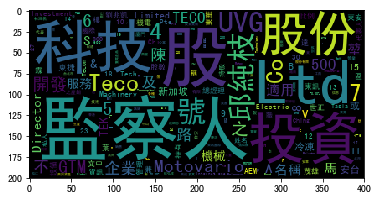

In [57]:
font = r"/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf"
wordcloud = WordCloud(font_path=font)
wordcloud.fit_words(wordDict)
plt.imshow(wordcloud)

In [55]:
frequent_key = sorted(wordDict, key=wordDict.get, reverse=True)
first10_key = frequent_key[:10]
first10_value = [wordDict[x] for x in first10_key]

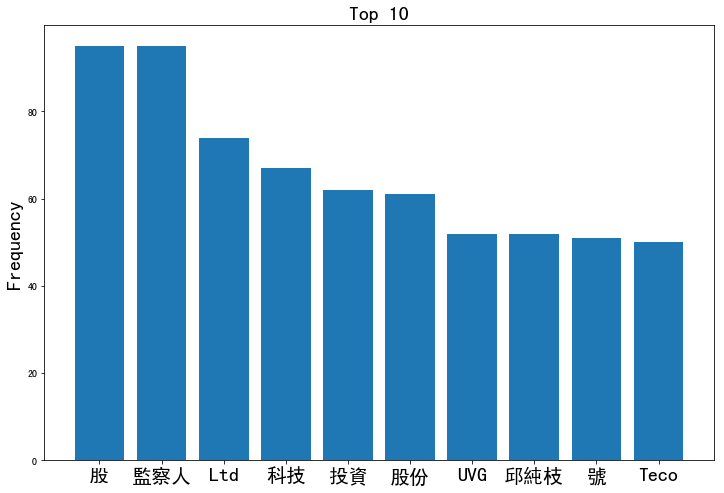

In [56]:
plt.figure(figsize=(12,8))
plt.ylabel('Frequency', fontsize=20)
plt.title("Top 10", fontsize=20)
plt.bar(range(0,10),first10_value)
plt.xticks(range(0,10),first10_key,fontsize=20)
plt.show()